Generating phase plane for ψ = 0 case...
(No echo chambers, baseline democracy)
--------------------------------------------------
Equilibrium: S* = 0.124, E* = 0.166


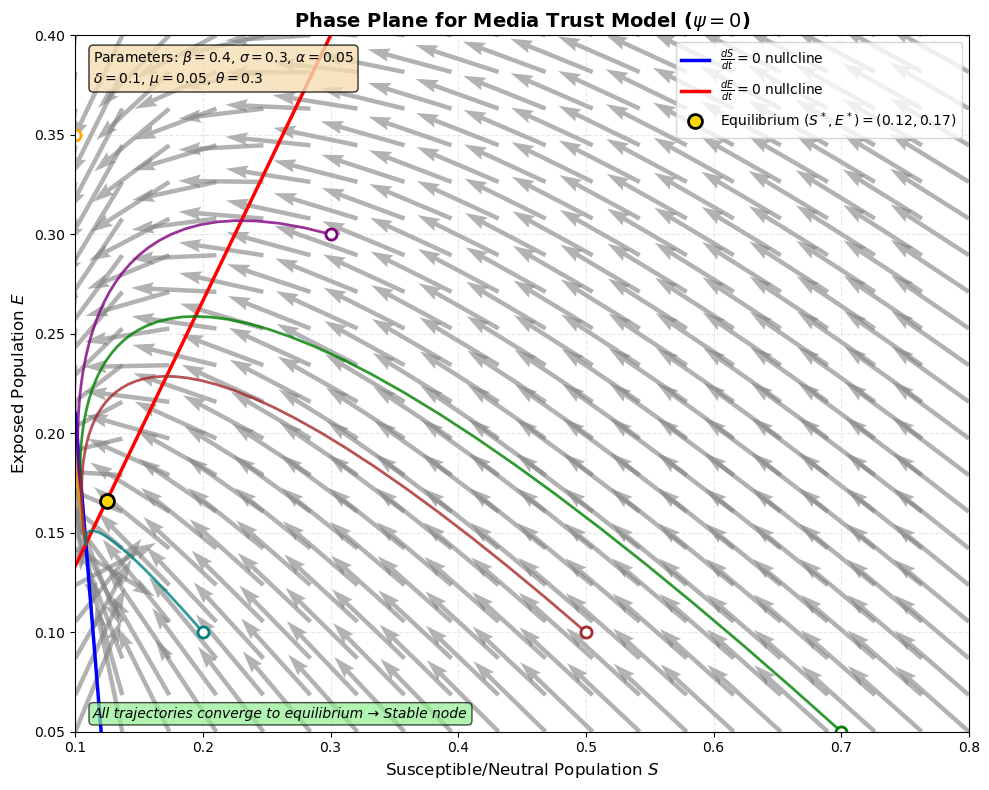


EIGENVALUE ANALYSIS FOR ψ = 0
Jacobian matrix:
J = [[-0.790, -0.100]
     [0.400, -0.300]]

Eigenvalues: λ₁ = -0.6865, λ₂ = -0.4035
Real parts: Re(λ₁) = -0.6865, Re(λ₂) = -0.4035

✓ Both eigenvalues have negative real parts.
✓ Equilibrium is locally asymptotically stable.

Trace(τ) = -1.0900 > 0
Determinant(Δ) = 0.2770 > 0
✓ Stability condition τ < 0 and Δ > 0 satisfied.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.patches as mpatches

# ==============================================
# PHASE PLANE FOR ψ = 0 CASE
# ==============================================

def phase_plane_psi0():
    """
    Generate phase plane for the reduced 2D system when ψ = 0.
    """
    # Parameters (baseline democracy)
    beta = 0.4    # exposure rate
    sigma = 0.3   # processing rate
    alpha = 0.05  # institutional reinforcement
    delta = 0.1   # trust decay rate
    mu = 0.05     # distrust recovery rate
    theta = 0.3   # probability exposure -> distrust
    
    # Reduced 2D system (S, E)
    # dS/dt = δ - δE - [β + α + δ + (δθβ/μ)]S
    # dE/dt = βS - σE
    
    # Coefficients
    A = beta + alpha + delta + (delta * theta * beta) / mu
    
    # Equilibrium point (from analytic solution)
    S_star = 1 / (1 + beta/sigma + ((1-theta)*beta + alpha)/delta + (theta*beta)/mu)
    E_star = (beta/sigma) * S_star
    
    print(f"Equilibrium: S* = {S_star:.3f}, E* = {E_star:.3f}")
    
    # Create grid for phase plane
    S_vals = np.linspace(0.1, 0.8, 20)
    E_vals = np.linspace(0.05, 0.4, 20)
    S_grid, E_grid = np.meshgrid(S_vals, E_vals)
    
    # Compute derivatives at each point
    dS_dt = delta - delta*E_grid - A*S_grid
    dE_dt = beta*S_grid - sigma*E_grid
    
    # Normalize arrows for better visualization
    magnitude = np.sqrt(dS_dt**2 + dE_dt**2)
    dS_norm = dS_dt / (magnitude + 1e-10)
    dE_norm = dE_dt / (magnitude + 1e-10)
    
    # ==============================================
    # Create the figure
    # ==============================================
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # 1. Plot vector field (direction field)
    ax.quiver(S_grid, E_grid, dS_norm, dE_norm, 
              color='gray', alpha=0.6, width=0.005,
              angles='xy', scale_units='xy', scale=15)
    
    # 2. Plot nullclines
    # dS/dt = 0 nullcline: E = 1 - (A/δ)S
    S_nc = np.linspace(0.1, 0.8, 100)
    E_nc_S = 1 - (A/delta) * S_nc
    # Keep only positive values (biologically meaningful)
    valid = E_nc_S > 0
    ax.plot(S_nc[valid], E_nc_S[valid], 'b-', linewidth=2.5, 
            label=r'$\frac{dS}{dt}=0$ nullcline')
    
    # dE/dt = 0 nullcline: E = (β/σ)S
    E_nc_E = (beta/sigma) * S_nc
    ax.plot(S_nc, E_nc_E, 'r-', linewidth=2.5, 
            label=r'$\frac{dE}{dt}=0$ nullcline')
    
    # 3. Mark equilibrium point (intersection of nullclines)
    ax.plot(S_star, E_star, 'ko', markersize=10, 
            markerfacecolor='gold', markeredgewidth=2,
            label=f'Equilibrium $(S^*,E^*)=({S_star:.2f},{E_star:.2f})$')
    
    # 4. Plot sample trajectories from different initial conditions
    def reduced_system(t, y):
        """ODE system for ψ=0: y = [S, E]"""
        S, E = y
        dS = delta - delta*E - A*S
        dE = beta*S - sigma*E
        return [dS, dE]
    
    # Different initial conditions
    initial_conditions = [
        [0.7, 0.05],   # High S, low E
        [0.3, 0.3],    # Medium both
        [0.1, 0.35],   # Low S, high E
        [0.5, 0.1],    # Typical
        [0.2, 0.1],    # Low both
    ]
    
    colors = ['green', 'purple', 'orange', 'brown', 'teal']
    t_span = (0, 50)  # Integrate for 50 time units
    
    for i, (S0, E0) in enumerate(initial_conditions):
        sol = solve_ivp(reduced_system, t_span, [S0, E0], 
                       method='RK45', dense_output=True,
                       rtol=1e-8, atol=1e-10)
        
        # Plot trajectory
        ax.plot(sol.y[0], sol.y[1], color=colors[i], linewidth=2, alpha=0.8)
        
        # Mark starting point
        ax.plot(S0, E0, 'o', color=colors[i], markersize=8, 
                markerfacecolor='white', markeredgewidth=2)
    
    # ==============================================
    # Formatting and labels
    # ==============================================
    ax.set_xlabel('Susceptible/Neutral Population $S$', fontsize=12)
    ax.set_ylabel('Exposed Population $E$', fontsize=12)
    ax.set_title(r'Phase Plane for Media Trust Model ($\psi = 0$)', 
                 fontsize=14, fontweight='bold')
    
    # Set axis limits
    ax.set_xlim([0.1, 0.8])
    ax.set_ylim([0.05, 0.4])
    
    # Add grid
    ax.grid(True, alpha=0.3, linestyle='--')
    
    # Add legend
    ax.legend(loc='upper right', fontsize=10)
    
    # Add parameter box
    param_text = (r'Parameters: $\beta=%.1f$, $\sigma=%.1f$, $\alpha=%.2f$' % (beta, sigma, alpha) + 
                  '\n' + r'$\delta=%.1f$, $\mu=%.2f$, $\theta=%.1f$' % (delta, mu, theta))
    
    ax.text(0.02, 0.98, param_text,
            transform=ax.transAxes, fontsize=10,
            verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    # Add stability info
    ax.text(0.02, 0.02, 
            'All trajectories converge to equilibrium → Stable node',
            transform=ax.transAxes, fontsize=10, style='italic',
            bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))
    
    plt.tight_layout()
    
    # Save figure
    plt.savefig('phase_plane_psi0.png', dpi=300, bbox_inches='tight')
    plt.savefig('phase_plane_psi0.pdf', bbox_inches='tight')
    plt.show()
    
    return S_star, E_star

# ==============================================
# EIGENVALUE ANALYSIS FOR ψ = 0
# ==============================================

def eigenvalues_psi0():
    """
    Compute and display eigenvalues for ψ=0 case.
    """
    # Same parameters
    beta = 0.4
    sigma = 0.3
    alpha = 0.05
    delta = 0.1
    mu = 0.05
    theta = 0.3
    
    # Jacobian matrix for reduced 2D system
    A = beta + alpha + delta + (delta * theta * beta) / mu
    J = np.array([[-A, -delta],
                  [beta, -sigma]])
    
    # Compute eigenvalues
    eigvals = np.linalg.eigvals(J)
    
    print("\n" + "="*50)
    print("EIGENVALUE ANALYSIS FOR ψ = 0")
    print("="*50)
    print(f"Jacobian matrix:")
    print(f"J = [[{-A:.3f}, {-delta:.3f}]")
    print(f"     [{beta:.3f}, {-sigma:.3f}]]")
    print(f"\nEigenvalues: λ₁ = {eigvals[0]:.4f}, λ₂ = {eigvals[1]:.4f}")
    print(f"Real parts: Re(λ₁) = {np.real(eigvals[0]):.4f}, Re(λ₂) = {np.real(eigvals[1]):.4f}")
    
    if np.all(np.real(eigvals) < 0):
        print("\n✓ Both eigenvalues have negative real parts.")
        print("✓ Equilibrium is locally asymptotically stable.")
    else:
        print("\n✗ At least one eigenvalue has non-negative real part.")
        print("✗ Equilibrium is unstable.")
    
    # Compute trace and determinant
    trace = np.trace(J)
    det = np.linalg.det(J)
    print(f"\nTrace(τ) = {trace:.4f} > 0")
    print(f"Determinant(Δ) = {det:.4f} > 0")
    
    # Stability by Routh-Hurwitz for 2D systems
    if trace < 0 and det > 0:
        print("✓ Stability condition τ < 0 and Δ > 0 satisfied.")
    else:
        print("⚠ Note: For 2D systems, stability requires τ < 0, Δ > 0")
    
    return eigvals

# ==============================================
# MAIN EXECUTION
# ==============================================

if __name__ == "__main__":
    print("Generating phase plane for ψ = 0 case...")
    print("(No echo chambers, baseline democracy)")
    print("-" * 50)
    
    # Generate phase plane
    S_star, E_star = phase_plane_psi0()
    
    # Compute eigenvalues
    eigenvalues_psi0()